In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
dataset = pd.read_csv('Crop_recommendation.csv') # to import the dataset into a variable
# Splitting the attributes into independent and dependent attributes
X = dataset.iloc[:, :-1].values # attributes to determine dependent variable / Class
Y = dataset.iloc[:, -1].values # dependent variable / Class

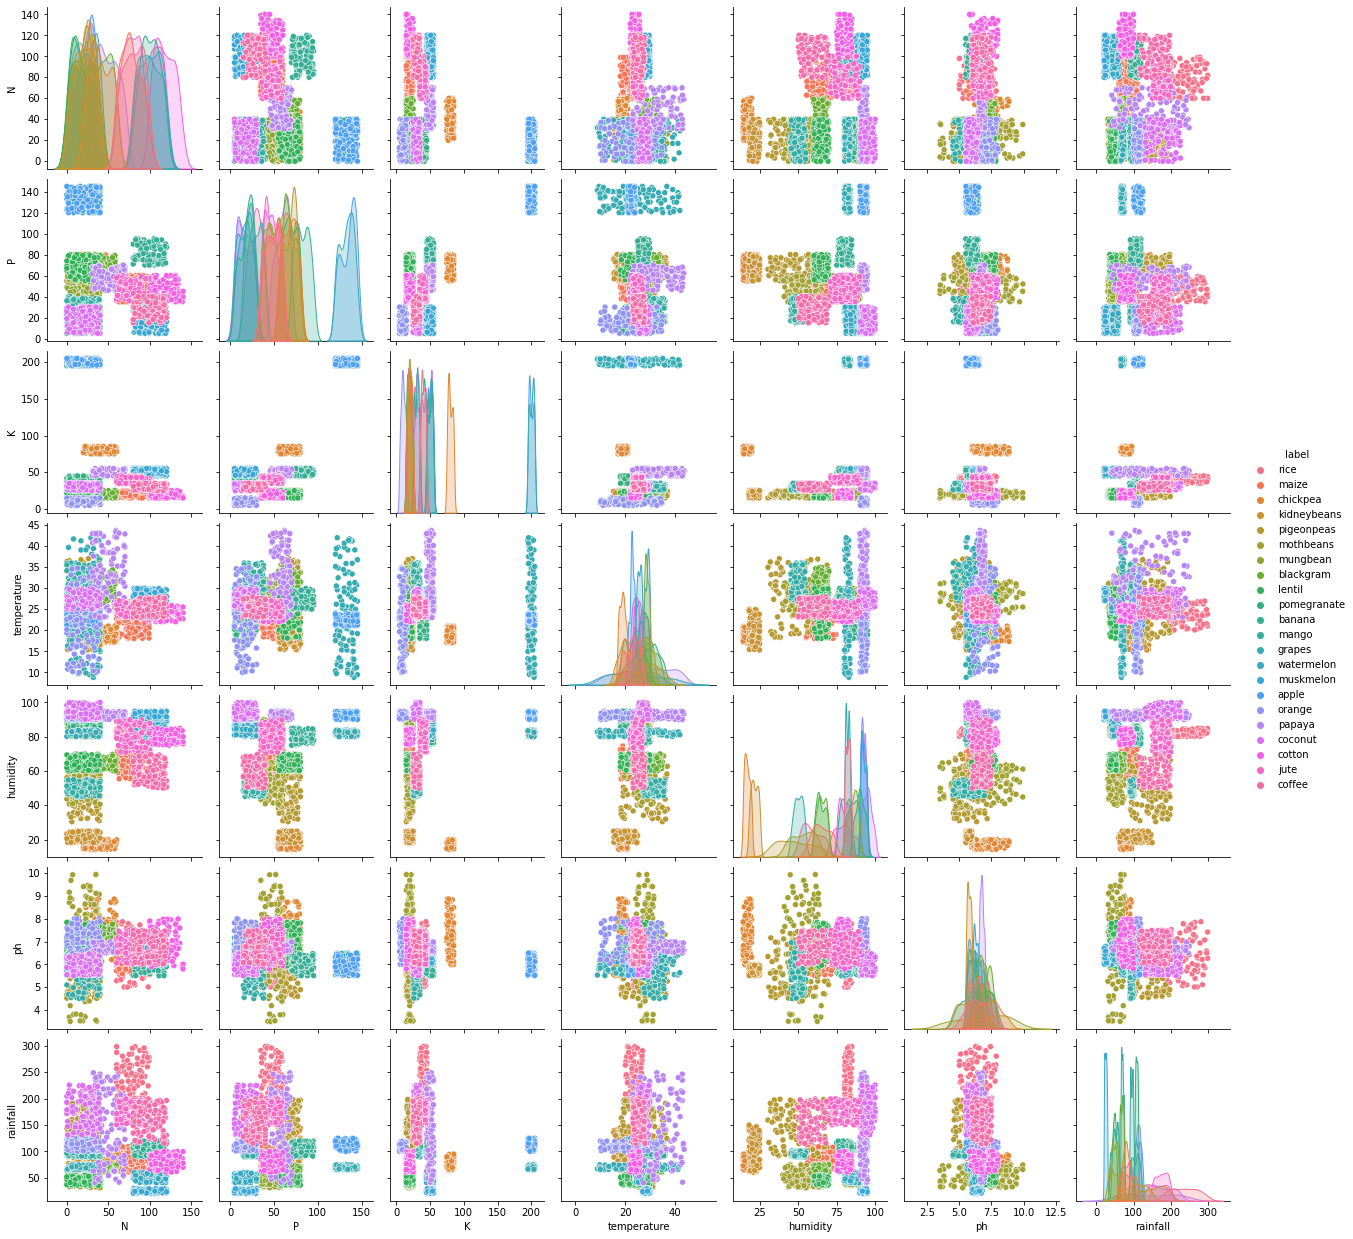

In [3]:
sns.pairplot(data=dataset, hue = 'label')

<AxesSubplot:>

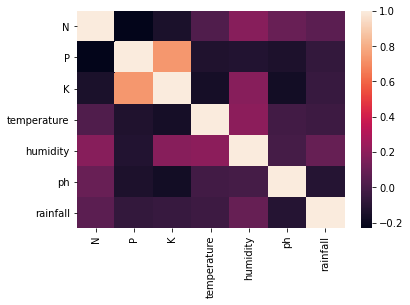

In [4]:
# correlation matrix
sns.heatmap(dataset.corr())

In [5]:
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([20, 20, 20, ...,  5,  5,  5])

In [6]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (1760, 7)
Testing split input-  (440, 7)


In [7]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [8]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.91      0.87      0.89        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
 

Text(0.5, 1.0, 'Accuracy Score: 0.9840909090909091')

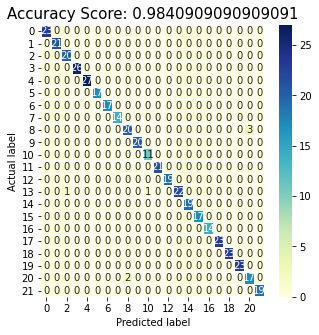

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot = True, cmap = 'YlGnBu',fmt = 'g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [10]:
df1 = dataset.copy()
df1 = df1.drop('label', axis =1)

list1 = Y.tolist()
type(df1.columns.tolist())
list2= df1.columns.tolist()
list2

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

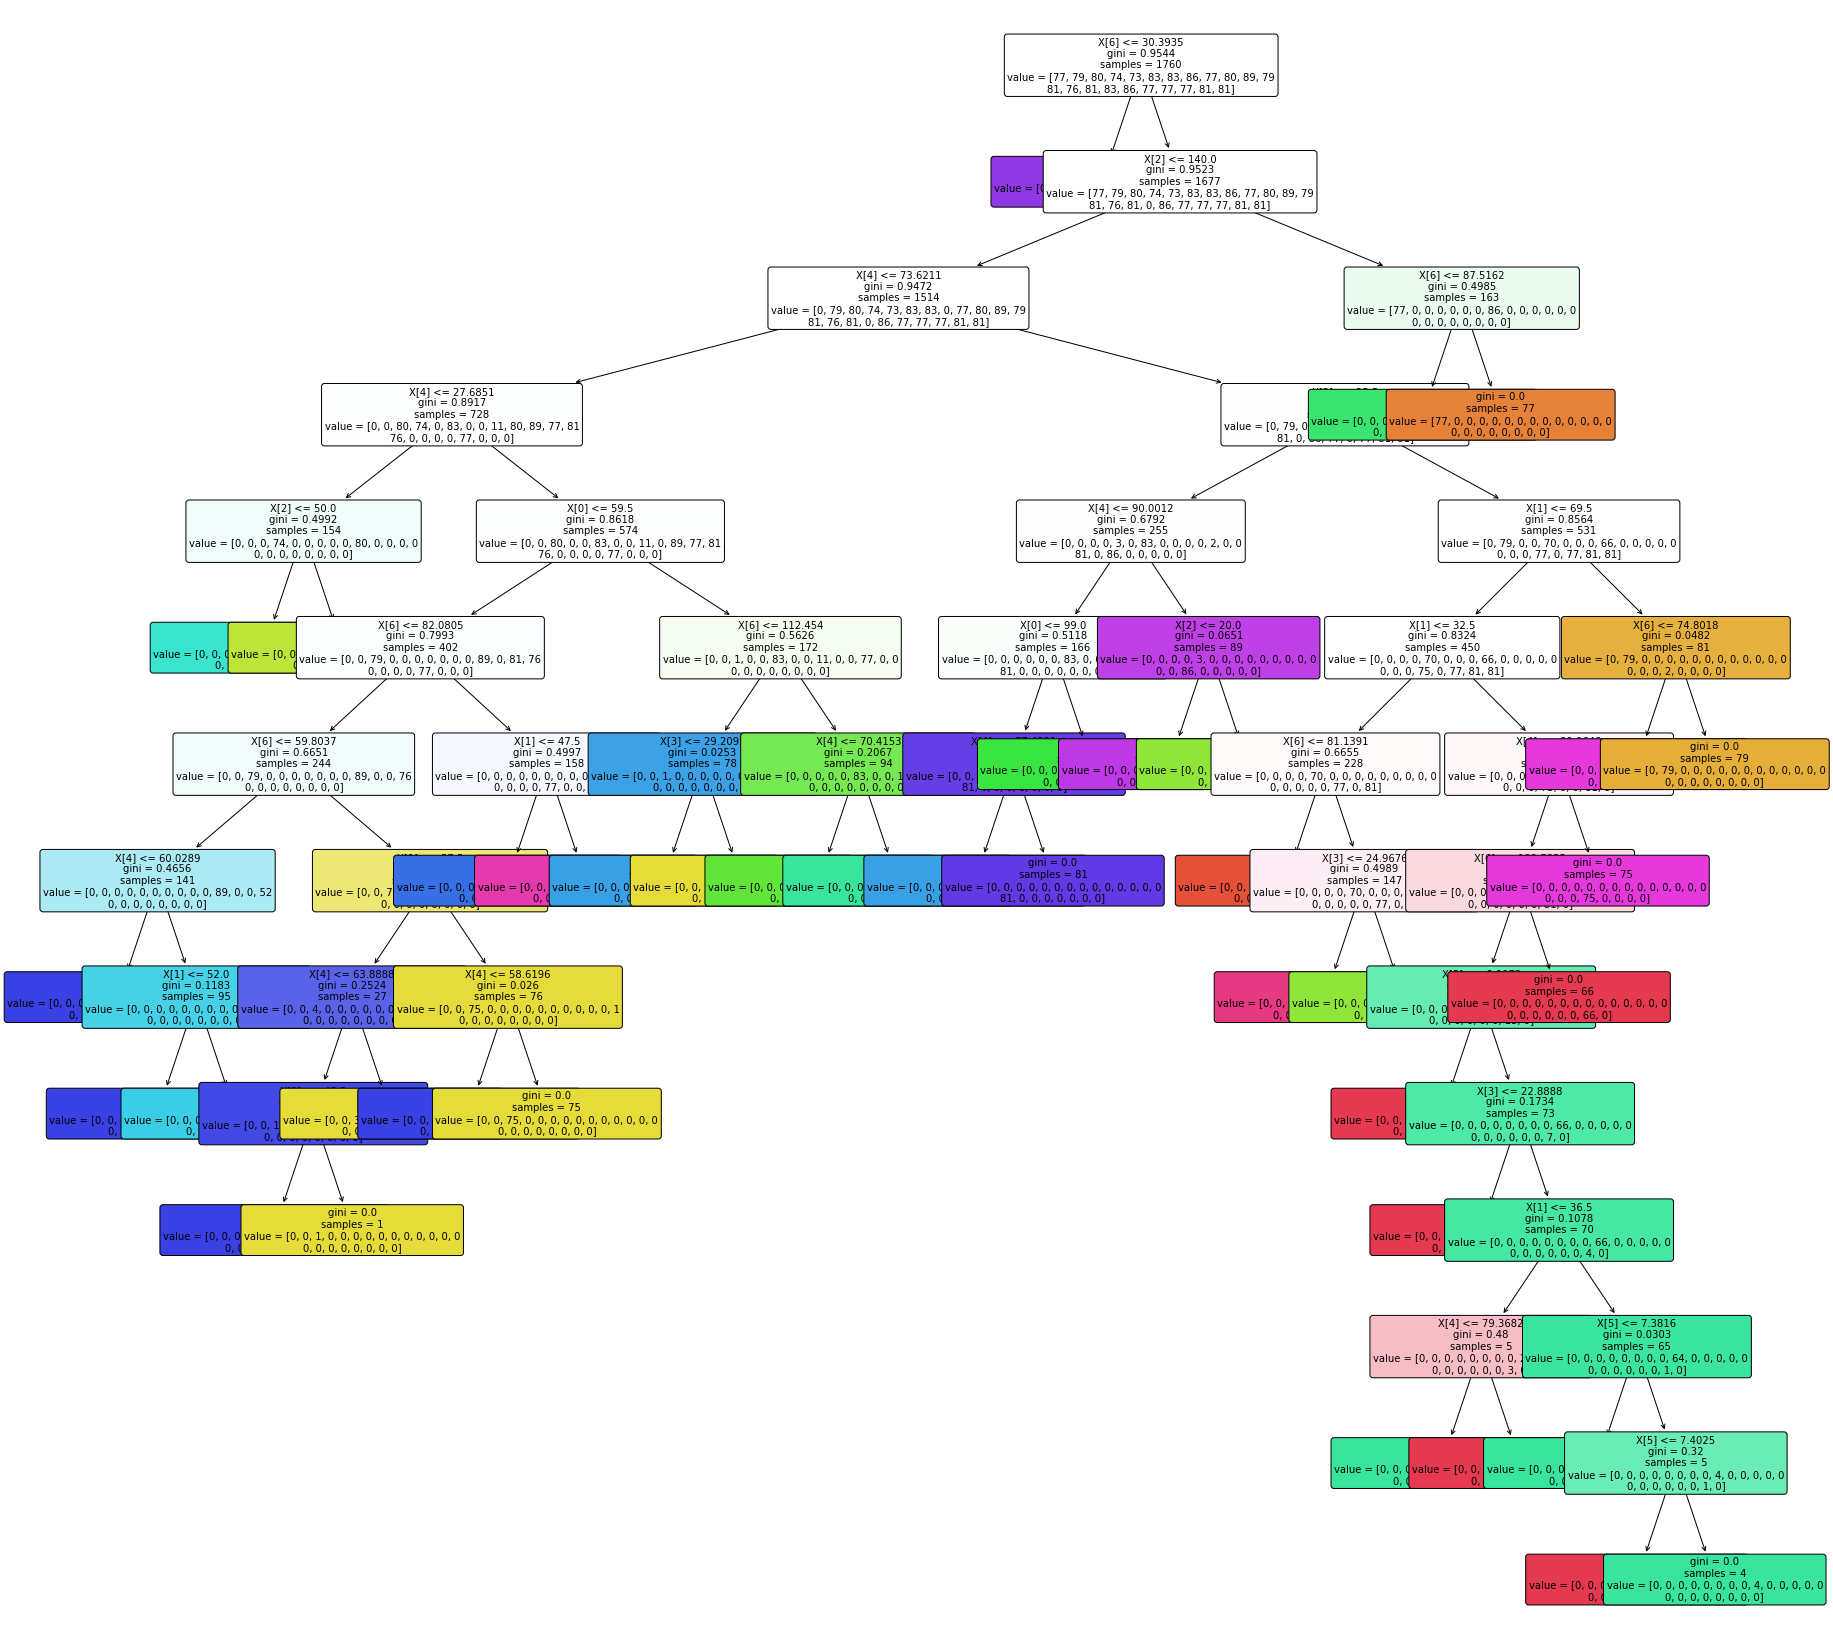

In [11]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
plt.figure(figsize=(30,30)) 
dec_tree = plot_tree(decision_tree=dtree, filled = True , precision = 4, rounded = True, fontsize=10)

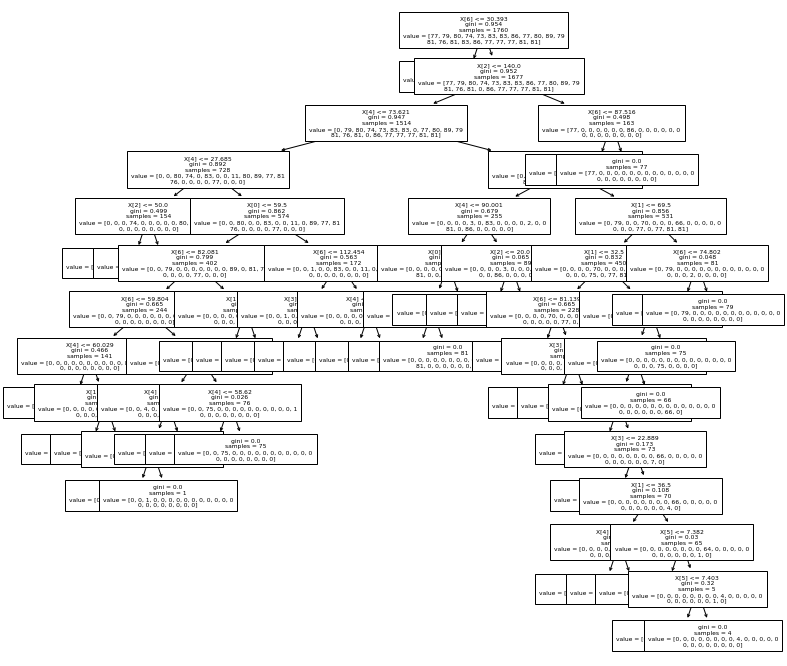

In [12]:
# save plot
plt.figure(figsize=(12,12))
plot_tree(dtree, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

In [13]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_6 <= 30.39
|   |--- class: 15
|--- feature_6 >  30.39
|   |--- feature_2 <= 140.00
|   |   |--- feature_4 <= 73.62
|   |   |   |--- feature_4 <= 27.69
|   |   |   |   |--- feature_2 <= 50.00
|   |   |   |   |   |--- class: 9
|   |   |   |   |--- feature_2 >  50.00
|   |   |   |   |   |--- class: 3
|   |   |   |--- feature_4 >  27.69
|   |   |   |   |--- feature_0 <= 59.50
|   |   |   |   |   |--- feature_6 <= 82.08
|   |   |   |   |   |   |--- feature_6 <= 59.80
|   |   |   |   |   |   |   |--- feature_4 <= 60.03
|   |   |   |   |   |   |   |   |--- class: 13
|   |   |   |   |   |   |   |--- feature_4 >  60.03
|   |   |   |   |   |   |   |   |--- feature_1 <= 52.00
|   |   |   |   |   |   |   |   |   |--- class: 13
|   |   |   |   |   |   |   |   |--- feature_1 >  52.00
|   |   |   |   |   |   |   |   |   |--- class: 10
|   |   |   |   |   |   |--- feature_6 >  59.80
|   |   |   |   |   |   |   |--- feature_1 <= 57.50
|   |   |   |   |   |   |   |   |--- feature_4 <= 63.89

# DTree without outliers

In [14]:
# Remove Outliers
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
df_out = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-14-56b670891915>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-14-56b670891915>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]


In [15]:
X = df_out.iloc[:, :-1].values # attributes to determine dependent variable / Class
Y = df_out.iloc[:, -1].values # dependent variable / Class

In [16]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (1414, 7)
Testing split input-  (354, 7)


In [17]:
# Defining the decision tree algorithm
dtree2=DecisionTreeClassifier()
dtree2.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [18]:
# Predicting the values of test data
y_pred = dtree2.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

      banana       0.95      1.00      0.98        21
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        10
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        18
      cotton       0.90      1.00      0.95        18
        jute       0.81      0.81      0.81        16
 kidneybeans       1.00      1.00      1.00        22
      lentil       1.00      1.00      1.00        18
       maize       1.00      0.95      0.97        19
       mango       1.00      1.00      1.00        18
   mothbeans       1.00      1.00      1.00        14
    mungbean       0.95      1.00      0.97        18
   muskmelon       1.00      1.00      1.00        18
      orange       1.00      1.00      1.00        14
      papaya       1.00      0.77      0.87        13
  pigeonpeas       1.00      1.00      1.00        23
 

Text(0.5, 1.0, 'Accuracy Score: 0.9717514124293786')

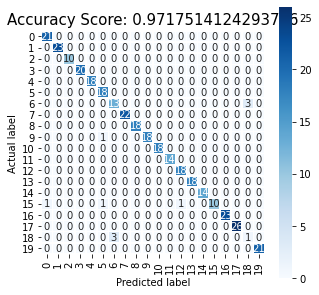

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree2.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

<AxesSubplot:xlabel='K'>

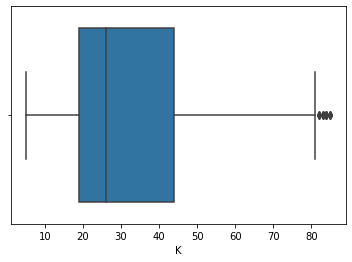

In [20]:
sns.boxplot(x=df_out['K'])

In [21]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(dtree, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.985 (0.008)
